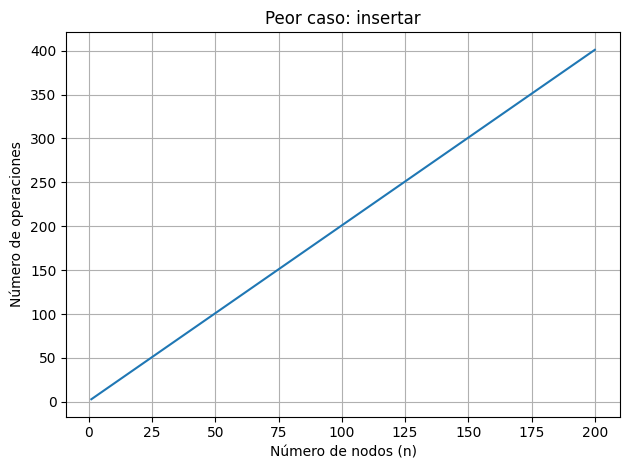

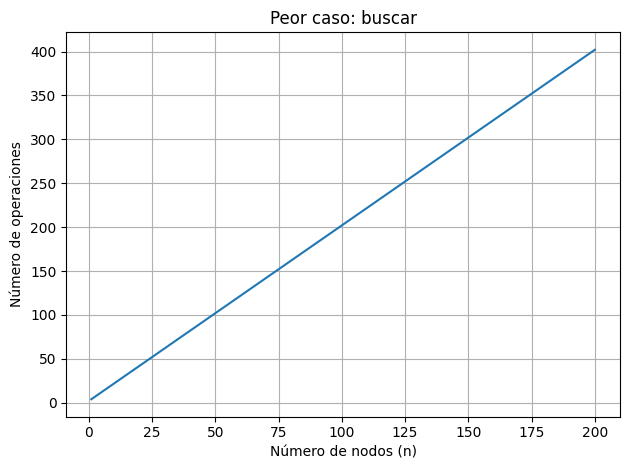

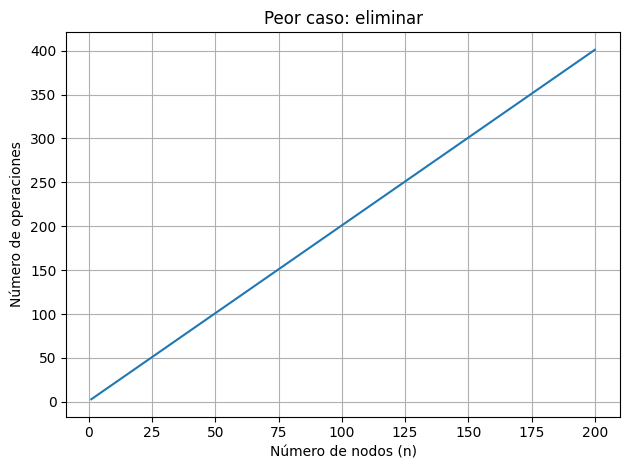

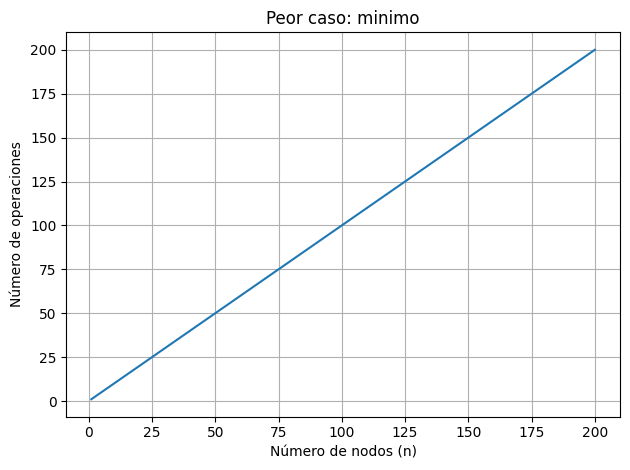

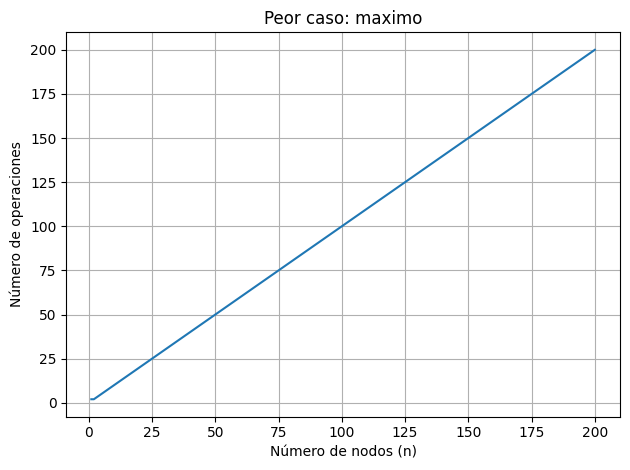

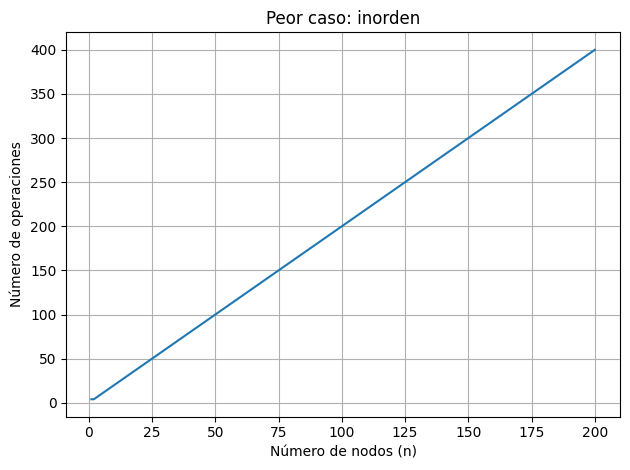

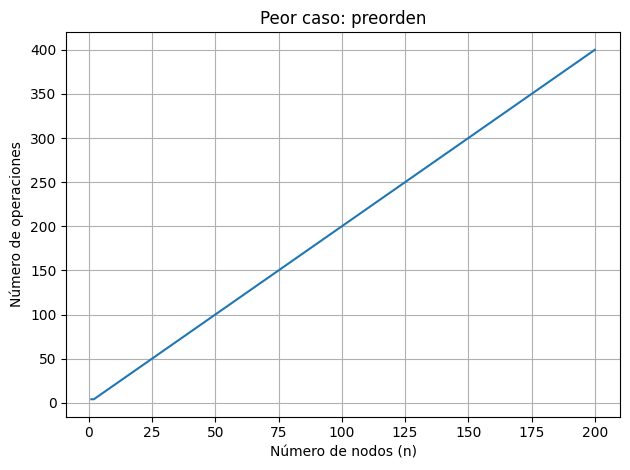

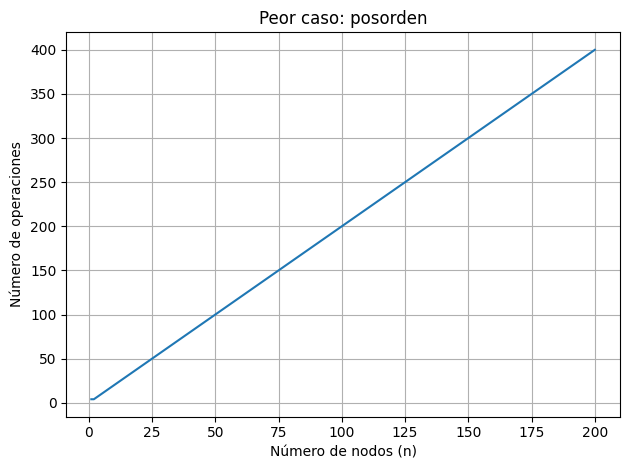

In [6]:
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None


class ArbolBinario:
    def __init__(self):
        self.raiz = None
        self.contador = 0

    def reiniciar_contador(self):
        self.contador = 0

    def insertar(self, raiz, nuevo):
        self.contador += 1
        if raiz is None:
            self.contador += 1
            if self.raiz is None:
                self.raiz = nuevo
            return nuevo
        self.contador += 1
        if nuevo.valor < raiz.valor:
            if raiz.izquierda is None:
                self.contador += 1
                raiz.izquierda = nuevo
            else:
                self.insertar(raiz.izquierda, nuevo)
        elif nuevo.valor > raiz.valor:
            if raiz.derecha is None:
                self.contador += 1
                raiz.derecha = nuevo
            else:
                self.insertar(raiz.derecha, nuevo)
        return raiz

    def buscar(self, raiz, valor):
        self.contador += 1
        if raiz is None:
            return None
        self.contador += 1
        if raiz.valor == valor:
            return raiz.valor
        elif valor < raiz.valor:
            return self.buscar(raiz.izquierda, valor)
        else:
            return self.buscar(raiz.derecha, valor)

    def eliminar(self, raiz, valor):
        self.contador += 1
        if raiz is None:
            return None
        self.contador += 1
        if valor < raiz.valor:
            raiz.izquierda = self.eliminar(raiz.izquierda, valor)
        elif valor > raiz.valor:
            raiz.derecha = self.eliminar(raiz.derecha, valor)
        else:
            self.contador += 1
            if raiz.izquierda is None:
                return raiz.derecha
            elif raiz.derecha is None:
                return raiz.izquierda
            sucesor = self.minimo(raiz.derecha)
            raiz.valor = sucesor.valor
            raiz.derecha = self.eliminar(raiz.derecha, sucesor.valor)
        return raiz

    def minimo(self, raiz):
        self.contador += 1
        if raiz is None:
            return None
        while raiz.izquierda is not None:
            self.contador += 1
            raiz = raiz.izquierda
        return raiz

    def maximo(self, raiz):
        self.contador += 1
        if raiz is None:
            return None
        while raiz.derecha is not None:
            self.contador += 1
            raiz = raiz.derecha
        return raiz

    def recorrido_inorden(self, raiz):
        if raiz is not None:
            self.contador += 1
            self.recorrido_inorden(raiz.izquierda)
            self.contador += 1
            self.recorrido_inorden(raiz.derecha)

    def recorrido_preorden(self, raiz):
        if raiz is not None:
            self.contador += 1
            self.recorrido_preorden(raiz.izquierda)
            self.contador += 1
            self.recorrido_preorden(raiz.derecha)

    def recorrido_posorden(self, raiz):
        if raiz is not None:
            self.contador += 1
            self.recorrido_posorden(raiz.izquierda)
            self.contador += 1
            self.recorrido_posorden(raiz.derecha)


def construir_degenerado_derecha(n):
    arbol = ArbolBinario()
    for i in range(1, n + 1):
        arbol.insertar(arbol.raiz, Nodo(i))
    return arbol

def construir_degenerado_izquierda(n):
    arbol = ArbolBinario()
    for i in range(n, 0, -1):
        arbol.insertar(arbol.raiz, Nodo(i))
    return arbol


def graficar_peor_caso(max_n=100):
    tamaños = list(range(1, max_n + 1))
    resultados = {
        "insertar": [],
        "buscar": [],
        "eliminar": [],
        "minimo": [],
        "maximo": [],
        "inorden": [],
        "preorden": [],
        "posorden": []
    }

    for n in tamaños:
        arbol = construir_degenerado_derecha(n)

        arbol.reiniciar_contador()
        arbol.insertar(arbol.raiz, Nodo(n + 1))
        resultados["insertar"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.buscar(arbol.raiz, n + 1)
        resultados["buscar"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.eliminar(arbol.raiz, n)
        resultados["eliminar"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.maximo(arbol.raiz)
        resultados["maximo"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.recorrido_inorden(arbol.raiz)
        resultados["inorden"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.recorrido_preorden(arbol.raiz)
        resultados["preorden"].append(arbol.contador)

        arbol.reiniciar_contador()
        arbol.recorrido_posorden(arbol.raiz)
        resultados["posorden"].append(arbol.contador)

        arbol_izq = construir_degenerado_izquierda(n)
        arbol_izq.reiniciar_contador()
        arbol_izq.minimo(arbol_izq.raiz)
        resultados["minimo"].append(arbol_izq.contador)

    for metodo, ops in resultados.items():
        plt.figure()
        plt.plot(tamaños, ops)
        plt.title(f"Peor caso: {metodo}")
        plt.xlabel("Número de nodos (n)")
        plt.ylabel("Número de operaciones")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


graficar_peor_caso(max_n=200)
